# Computação Simbólica - SymPy
## Andre Nepomuceno - UFF

#### Instalação: conda install sympy

In [1]:
import matplotlib.pyplot
import numpy as np
import sympy
from sympy import I, pi,oo
from sympy.printing.latex import print_latex
sympy.init_printing()
%matplotlib inline

**1. Simbolos**

In [2]:
x = sympy.Symbol("x")

In [3]:
y = sympy.Symbol("y", real=True)
y.is_real

True

In [4]:
sympy.Symbol("z", imaginary=True).is_real

False

**Argumentos de Symbol**

Argumento| Atributo | 
:------|:-----------|
real, imginary     | is_real, is_imginary |
positive, negative |  is_positive, is_negative | 
integer            |  is_integer | 
odd, even          | is_odd, is_even |
prime              |  is_prime |
finite, infinite   | is_finite, is_infinite | 

<font color='blue'>Adicionar essas informções ajuda o SymPy a simplificar as expressões.  Exemplo:</font>

In [5]:
x = sympy.Symbol("x")
y = sympy.Symbol("y", real=True,positive=True)

In [6]:
sympy.sqrt(x**2)

In [7]:
sympy.sqrt(y**2)

<font color='blue'>Para criar vários símbolos, use sympy.symbols:</font>

In [8]:
a, b, c = sympy.symbols("a, b, c", positive=True)

**2. Números**

<font color='blue'>Para manipular exmpressões simbólicas, não podemos usar diretamente os tipos de dados 
<br>
float e int. Para expressõs algébricas, devemos usar sympy.Integer e sympy.Float</font>

In [9]:
i = sympy.Integer(21)
type(i)
#sympify

sympy.core.numbers.Integer

In [10]:
#Note que i é um inteiro ESPECÍFICO
i.is_Symbol

False

<font color='blue'>No caso de número reais, podemos especificar precisão</font>

In [11]:
sympy.Float(0.3,20)

In [12]:
sympy.Float(0.3)

<font color='blue'>Números racionais podem ser criados com a classe Rational</font>

In [13]:
r1 = sympy.Rational(2,3)
r1

In [14]:
r2 = sympy.Rational(4,5)
r1/r2

**3. Símbolos Especiais**

Símbolo Matemático| Símbolo do SymPy | 
:------|:-----------|
$\pi$    | sympy.pi |
$e$       | sympy.E | 
$\gamma$  | sympy.EulerGamma | 
$i$       | sympy.I |
$\infty$    | sympy.oo| 

**<font color='red'>Warning: note que 'pi' e os demais, nesse caso, se referem ao símbolo, 
 <br>
 não ao valor (np.pi)</font>**

In [15]:
#Exemplo
2*sympy.pi

**4. Funções**

**<font color='blue'>Funções Indefinidas</font>**

In [16]:
#Funções indefinidas 
x,y,z = sympy.symbols("x,y,z")
f = sympy.Function('f')
type(f)

sympy.core.function.UndefinedFunction

In [17]:
f(x)

In [18]:
g = sympy.Function("g")(x, y,z)
g

In [19]:
g.free_symbols

<font color='blue'> Uma aplicação de funções indefinidas é EDO.</font>

**<font color='blue'>Funções Definidas</font>**

In [20]:
sympy.sin(x)

In [21]:
sympy.sin(pi*1.5)

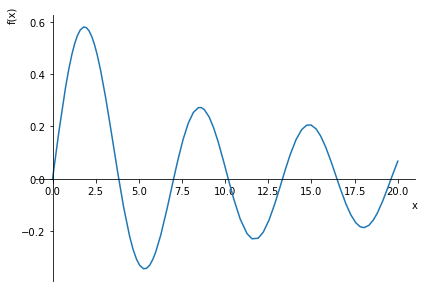

In [22]:
#Funções especiais: besselj
h3 = sympy.besselj(1,x)
sympy.plot(h3,(x,0,20))

In [23]:
#Funções especiais
#help(sympy.functions.special)

In [24]:
#Funções com método Lambda
h = sympy.Lambda(x,x**2)
h

In [25]:
h(5)

In [26]:
h(1+x)

In [27]:
h2 = sympy.Lambda((x,y),sympy.sin(x)+y**2)
h2

**5. Expressões**

<font color='blue'> No SymPy, uma expressão é uma 'árvore' onde as folhas
<br> são os símbolos e os nós as operações matemáticas.</font>

In [28]:
expr = 1 + 2 * x**2 + 3 * x**3
expr

![title](plot_26.png)

<font color='blue'>Cada termo da expressão pode ser acessado com o argumento **args**</font>

In [29]:
expr.args

In [30]:
expr.args[1]

In [31]:
expr.args[1].args[1]

**6. Manipulando Expressões**

6.1 - Simplificação: método simplify()

In [32]:
expr = 2 * (x**2 - x) - x * (x + 1)
expr

In [33]:
sympy.simplify(expr)

In [34]:
#Note que a expressão original NÃO muda (expressões são imutáveis)
expr

In [35]:
expr = 2 * sympy.cos(x) * sympy.sin(x)
expr

In [36]:
expr.simplify()

6.2  Expansão: método expand()

In [37]:
expr = (x + 1) * (x + 2)
sympy.expand(expr)

<font color='blue'>Depedento da expressão a ser expandida, podemos usas as opções: 
<br>  mul=True(produtos), trig=True (trigonométricos), log=True (logarítimo), 
<br> complex=True (separa real e imaginário), power_base=True ou  power_exp=True</font>

In [38]:
#Exemplo trigonométrico
sympy.sin(x + y).expand(trig=True)

In [39]:
sympy.log(a * b).expand(log=True)

In [40]:
 sympy.exp(I*a + b).expand(complex=True)

6.3 Fatorizar e Combinar

In [41]:
#Fatorizar
sympy.factor(x**2 - 1)

In [42]:
#Combinar
expr = x + y + x * y * z
expr.collect(x)

In [43]:
expr.collect(y)

In [44]:
#comandos em cadeia:
expr = sympy.cos(x + y) + sympy.sin(x - y)
expr

In [45]:
expr.expand(trig=True).collect([sympy.cos(x),sympy.sin(x)])

In [46]:
expr.expand(trig=True).collect([sympy.cos(x),sympy.sin(x)]).collect(sympy.cos(y) - sympy.sin(y))

6.4 - Reescrever Frações

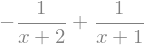

In [47]:
#separar
sympy.apart(1/(x**2 + 3*x + 2))

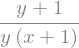

In [48]:
#juntar
sympy.together(1 / (y * x + y) + 1 / (1+x))

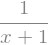

In [49]:
#cancelar
sympy.cancel(y / (y * x + y))

6.5 Substituições 

<font color='blue'>Pode-se substituir simbolos ou partes de uma expressão com o
<br> método subs(). O primeiro argumento é o simbolo a ser substituído,
<br>e o segundo o substituto.</font>

In [50]:
sympy.sin(x * sympy.exp(x)).subs(x, y)

<font color='blue'>Para substituir vários simbolos, podemos suar um dicionário.</font>

In [51]:
expr =  sympy.sin(x * z)
expr

In [52]:
sb = {z: sympy.exp(y), x: y, sympy.sin: sympy.cos}

In [53]:
expr.subs(sb)

In [54]:
expr1 = x * y + z**2 *x
values = {x: 1.25, y: 0.4, z: 3.2}

In [55]:
expr1.subs(values)

**7. Cálculo Numérico**

<font color='blue'>Para executar cálculos númericos, podemos usar oos métodos N() ou evalf().</font>

In [56]:
sympy.N(1+pi)

In [57]:
(x+1/pi).evalf(10)

<font color='blue'>Para calcular expressões dado uma sequência de valores, podemo usar loops,
<br>que é **ineficiente**, ou o método mais eficiente sympy.lambdify().</font>

In [58]:
#Exemplo com loop

In [59]:
expr = sympy.sin(pi * x * sympy.exp(x))
expr

In [60]:
[expr.subs(x, xx).evalf(3) for xx in range(0, 10)]

In [61]:
%timeit [expr.subs(x, xx).evalf(3) for xx in range(0, 10)]

927 µs ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<font color='blue'>Os argumentos de lambdify são símbolos e expressões, e retorna uma função
<br> que deve ser os valores **NUMÉRICOS**.</font>

In [62]:
expr_func = sympy.lambdify(x, expr)
expr_func(1.0)

In [63]:
#Para vetorizar o cálculo, devemos usar a opção 'numpy'

In [64]:
expr_func2 = sympy.lambdify(x, expr,'numpy')
xvalues = np.arange(0,10)
expr_func2(xvalues)

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687])

In [65]:
%timeit expr_func2(xvalues)

2.33 µs ± 49 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [66]:
yvalues = np.ones((2,2))
expr_func2(yvalues)

array([[0.77394269, 0.77394269],
       [0.77394269, 0.77394269]])

**8. Derivada, Integral e Limite**

**<font color='blue'>Derivadas: sympy.diff e sympy.Derivative</font>**

In [67]:
f = sympy.Function('f')(x)

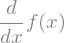

In [68]:
sympy.diff(f,x)

In [69]:
#Derivada de ordem n

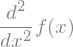

In [70]:
sympy.diff(f,x,2)  #ousympy.diff(f,x,x)

In [71]:
#Derivada parcial

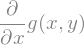

In [72]:
g = sympy.Function('g')(x, y)
sympy.diff(g,x)

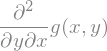

In [73]:
sympy.diff(g,x,y)

In [74]:
#Derivadas de expressões
expr = x**4 + x**3 + x**2 + x + 1
expr.diff(x)
#sympy.diff(expr,x)

In [75]:
expr = (x + 1)**3 * y ** 2 * (z - 1)
expr.diff(x,y)

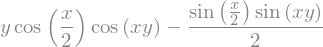

In [76]:
expr = sympy.sin(x * y) * sympy.cos(x / 2)
expr.diff(x)

<font color='blue'>Se desejarmos uma **representão simbólica** no lugar da expressão resultante
<br> da derivada, demos usar a classe sympy.Derivative. Para calcular a derivada,
<br> chamamos o método doit().</font>

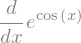

In [77]:
d = sympy.Derivative(sympy.exp(sympy.cos(x)), x)
d

In [78]:
#calcule a derivada
d.doit()

**<font color='blue'>Integrais: simpy.integrate e simpy.Integral</font>**

In [79]:
a, b, x, y = sympy.symbols("a, b, x, y")
f = sympy.Function("f")(x)

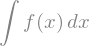

In [80]:
#Integral indefinida
sympy.integrate(f)

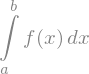

In [81]:
#Integral definida (devemos passar uma tupla)
sympy.integrate(f, (x, a, b))

In [82]:
#Ingegral de expressões
sympy.integrate(sympy.sin(x))

In [83]:
sympy.integrate(sympy.exp(-x**2), (x, 0, oo)) #evalf

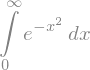

In [84]:
sympy.Integral(sympy.exp(-x**2), (x, 0, oo))   #doit()

<font color='blue'>Quando SymPy não consegue resolver a integral, ele retorna a expressão formal:</font>

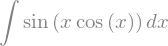

In [85]:
sympy.integrate(sympy.sin(x * sympy.cos(x)))

<font color='blue'>No caso de integrais multidimensionais, as variáveis de integração 
<br> devem ser passadas explicitamente.</font>

In [86]:
expr = (x + y)**2

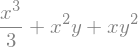

In [87]:
sympy.integrate(expr, x)

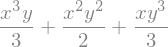

In [88]:
sympy.integrate(expr, x, y)

In [89]:
sympy.integrate(expr, (x, 0, 1), (y, 0, 1))

**<font color='blue'>Limites: sympy.limit e sympy.Limit</font>**

In [90]:
#Exemplo
sympy.limit(sympy.sin(x)/ x, x, 0) #limite quando x -> 0

In [91]:
#Exemplo: limite em um lado
sympy.limit(1/x, x, 0,'-')

**Exemplo: Campo Magnético de um Solenoide**

![title](plot_27.png)

\begin{equation}
B(z_0) = \frac{\mu_0 N i}{2L} \int_{-L/2}^{L/2}\frac{a^2}{[(z_0-z)^2 + a^2]^{3/2}} dz
\end{equation}

In [92]:
#Definição dos simbolos
z = sympy.Symbol("z",real=True)
z0 = sympy.Symbol("z0",real=True)
a = sympy.Symbol("a",real=True,positive=True)
i = sympy.Symbol("i",real=True,positive=True)
N = sympy.Symbol("N",real=True,positive=True)
mu0 = sympy.Symbol("mu_0",real=True)
L = sympy.Symbol("L",real=True)
R1 = sympy.Symbol("R1",real=True)
R2 = sympy.Symbol("R2",real=True)

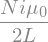

In [93]:
#termo constante
const = mu0*i*N/(2*L)
const

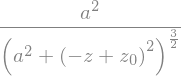

In [94]:
espira = a**2/((z0-z)**2+a**2)**(sympy.Rational(3/2))
espira

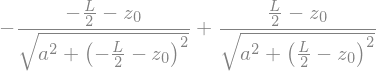

In [95]:
solenoide = sympy.integrate(espira,(z,-L/2,L/2))
solenoide

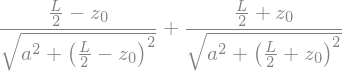

In [96]:
solenoide = solenoide.simplify()
solenoide

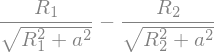

In [97]:
solenoide2 = solenoide.subs(z0+L/2,R1).subs(z0-L/2,R2)
solenoide2

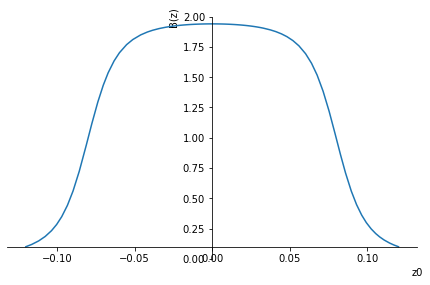

In [98]:
params = {a: 0.02, L: 0.16}
sympy.plot(solenoide.subs(params),(z0,-0.12,0.12),ylim=[0,2],axis_center=(0,0.1),ylabel='B(z)')

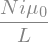

In [99]:
#Campo de um solenoide infinito
const*sympy.limit(solenoide,L,oo)

<font color='blue'>Escrever o resultado em Latex</font>

In [100]:
print_latex(solenoide2,mode='equation')

\begin{equation}\frac{R_{1}}{\sqrt{R_{1}^{2} + a^{2}}} - \frac{R_{2}}{\sqrt{R_{2}^{2} + a^{2}}}\end{equation}


In [101]:
print_latex(const)

\frac{N i \mu_{0}}{2 L}


In [102]:
s1 = sympy.latex(solenoide2,mode='equation')
out_file = open("output.tex","w")
out_file.write(s1)
out_file.close()

**9. Series**

<font color='blue'>Podemos expandir uma funções em série com sympy.series().
<br> Devemos passar a função, a variável (simbolo) e, opcionalmente, um ponto x0
<br> em torno do qual a função será expandida, e a ordem $n$ da expansão.</font>  

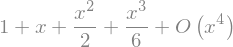

In [103]:
#Exemplo
sympy.exp(x).series(n=4) 

In [104]:
#Exemplo
expr1 = (1/(1+x))
expr1.series()

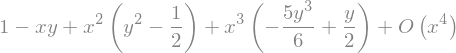

In [105]:
expr2 = sympy.cos(x) / (1 + sympy.sin(x * y))
expr2.series(x,n=4)

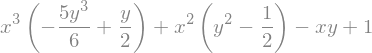

In [106]:
#Para remover o termo O(x^n), usamoos remove.O()
expr2.series(x,n=4).removeO()

**Exemplo: Oscilação não Linear**

![title](plot_28.png)

\begin{equation}
F = -2kx \left( 1 - \frac{1}{\sqrt{1+(x/l)^2}} \right )
\end{equation}

In [107]:
x = sympy.Symbol('x', real=True)
l = sympy.Symbol('l', real=True,positive=True)
k = sympy.Symbol('k', real=True,positive=True)
F = sympy.Function('F')(x)

In [108]:
f1 = -2*k*x

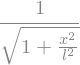

In [109]:
f2 = 1/(sympy.sqrt(1+(x/l)**2))
f2

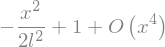

In [110]:
f3 = f2.series(x,n=4)
f3

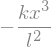

In [111]:
f4 = f1*(1-f3.removeO())
f4

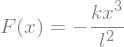

In [112]:
sympy.Eq(F,f4)

In [113]:
values = {x:0.01,k:30,l:0.1}
f4.subs(values)

**10. Equações**

<font color='blue'>A expressão passada para a função sympy.solve() assume igualdado a zero.</font>

In [114]:
x = sympy.Symbol("x")
sympy.solve(x**2 + 2*x - 3)

<font color='blue'>O argumento dict=**True** retorna a solução como um dicionário.</font>

In [115]:
sol = sympy.solve(x**2 + 2*x - 3,dict=True)
sol

<font color='blue'>Quando a expressão tem vários símbolos, a variável a ser resolvida deve ser passada:</font>

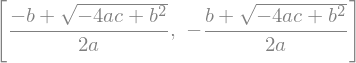

In [116]:
a, b, c = sympy.symbols("a, b, c")
sympy.solve(a * x**2 + b * x + c, x)

In [117]:
#Exemplo 2
sympy.solve(sympy.sin(x) - sympy.cos(x), x) 

In [119]:
#Exemplo de erro:
#sympy.solve(sympy.tan(x) + x, x)

<font color='blue'>Sistema de Equações</font>

In [120]:
eq1 = x**2 - y
eq2 = y**2 - x

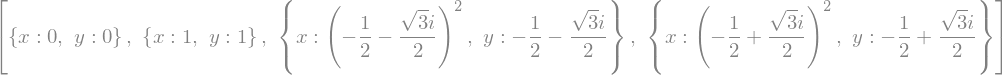

In [121]:
sols =  sympy.solve([eq1, eq2], [x, y], dict=True)
sols

In [122]:
#Verifique solução
eq1.subs(sols[0])